In [1]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import csv

from torch.utils.data import DataLoader, Subset
from torchvision.transforms import Compose, ToTensor, Resize
from sklearn.model_selection import train_test_split
from torchvision.datasets import ImageFolder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## Getting Testing probability

In [2]:
# @torch.no_grad
def get_probability(model, data_set, data_labels, phase ,data_dir, model_name, device):
    print("\nGetting the Probability Distribution")
    correct = 0
    total = 0
    preds, y_pred, y_true=[],[], []
    num=0
    num_classes =2
    temp_array = np.zeros((len(data_set),num_classes))
    with torch.no_grad():
      for i in range (len(data_set)):
          test_data = data_set[i].to(device)
          outputs = model(test_data)
          print("predicted Outputs: ", outputs.to('cpu')[0].tolist())
          _, pred = torch.max(outputs, 1)
          # print("Preds :", pred)
          preds.append(outputs.to('cpu')[0].tolist())
          print("predicted: ", pred.to('cpu'), "Y_label", test_labels)
          # y_pred.append(pred.to('cpu').tolist())
          y_true.append(data_labels[i].tolist())
          prob = torch.nn.functional.softmax(outputs, dim=1)
          print("\n Prob:", prob)
          pred1=np.asarray(prob[0].tolist()[0: num_classes])
          y_pred.append(np.where(pred1==np.max(pred1))[0].tolist())
          temp_array[num] =np.asarray(prob[0].tolist()[0: num_classes])
          num = num+1
    cm = confusion_matrix(y_pred=y_pred, y_true=y_true)
    print("Length of y_pred and y_true", len(y_pred), "," , len(y_true))
    print('Test Accuracy={}'.format(accuracy_score(y_true=y_true, y_pred=y_pred)))
    sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
    print('Sensitivity : ', sensitivity*100 )

    Specificity = cm[1,1]/(cm[1,1]+cm[0,1])
    print('Specificity : ', Specificity*100 )
    accuracy = accuracy_score(y_true=y_true, y_pred=y_pred)
    f = open(os.path.join(data_dir,model_name+".csv") ,'w+',newline = '')
    writer = csv.writer(f)
    for i in range(len(dataloaders[phase])):
      writer.writerow(temp_array[i].tolist())
    f.close(  )
    return accuracy, y_true
   


In [3]:
a=np.zeros((5,2))
a

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [4]:
def fuzzy_measure(validation_accuracies: dict) :
    fuzzy_measures={}
    sum_accuracies = 0
    for classifier in validation_accuracies.keys():
        sum_accuracies += validation_accuracies[classifier]
    for classifier in validation_accuracies.keys():
        fuzzy_measures[classifier] = validation_accuracies[classifier]/ sum_accuracies
    return fuzzy_measures;

## Setup

In [5]:
extracted_features_dir = './extracted_features/'
data_dir="./results_dir/"

### Inception

### VGG16

### Xception

# Fuzzy measure assingment

In [6]:
import model1
dataset_path = "../Dataset/"
model_path = "../client/Models/"
data_dir_name = input("Enter the name of datset: Ex. data-1: ")
# model_name = input("Enter the name of model Ex. resnet18/vgg16/densenet: ")
data_dir = dataset_path + data_dir_name

dataloaders, dataset_sizes, class_names, device = model1.load_data(data_dir=data_dir, num_workers=1,batch_size=1)

print(dataset_sizes, device)
phase = 'test'
validation_accuracy={}

len:  2505
1878
1
Classes:  ['COVID-19', 'NORMAL']

Device:  cuda:4
{'train': 1878, 'test': 627} cuda:4


### Inception

### Xception

### vgg16

## Fuzzy measure assignment setup 2

In [7]:
data_set=[]
data_labels=[]
for test_data, test_labels in dataloaders[phase]:
    data_set.append(test_data)
    data_labels.append(test_labels)

### Resnet18

In [8]:
model_name = "resnet18"
loaded_model=torch.load( model_path+model_name+".pt")
loaded_model.eval()
loaded_model.to(device)
# loaded_model.load_weights(model_name+'_bestweight.h5')
w, labels1 = get_probability(loaded_model, data_set, data_labels, phase, data_dir, model_name, device)
validation_accuracy[model_name] = w


Getting the Probability Distribution
predicted Outputs:  [-6.510108470916748, 5.4221978187561035]
predicted:  tensor([1]) Y_label tensor([0])

 Prob: tensor([[6.5745e-06, 9.9999e-01]], device='cuda:4')
predicted Outputs:  [3.718808889389038, -4.077308654785156]
predicted:  tensor([0]) Y_label tensor([0])

 Prob: tensor([[9.9959e-01, 4.1116e-04]], device='cuda:4')
predicted Outputs:  [-5.521097183227539, 4.574028968811035]
predicted:  tensor([1]) Y_label tensor([0])

 Prob: tensor([[4.1279e-05, 9.9996e-01]], device='cuda:4')
predicted Outputs:  [1.7951606512069702, -2.360666275024414]
predicted:  tensor([0]) Y_label tensor([0])

 Prob: tensor([[0.9846, 0.0154]], device='cuda:4')
predicted Outputs:  [4.499238967895508, -5.372386455535889]
predicted:  tensor([0]) Y_label tensor([0])

 Prob: tensor([[9.9995e-01, 5.1616e-05]], device='cuda:4')
predicted Outputs:  [-7.012188911437988, 5.727632522583008]
predicted:  tensor([1]) Y_label tensor([0])

 Prob: tensor([[2.9320e-06, 1.0000e+00]], d

/home/pranab_2021cs25/anaconda3/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


tensor([0]) Y_label tensor([0])

 Prob: tensor([[0.9985, 0.0015]], device='cuda:4')
predicted Outputs:  [-4.415593147277832, 4.148506164550781]
predicted:  tensor([1]) Y_label tensor([0])

 Prob: tensor([[1.9080e-04, 9.9981e-01]], device='cuda:4')
predicted Outputs:  [-7.325583457946777, 6.493028163909912]
predicted:  tensor([1]) Y_label tensor([0])

 Prob: tensor([[9.9690e-07, 1.0000e+00]], device='cuda:4')
predicted Outputs:  [-4.665694713592529, 3.926046133041382]
predicted:  tensor([1]) Y_label tensor([0])

 Prob: tensor([[1.8560e-04, 9.9981e-01]], device='cuda:4')
predicted Outputs:  [-4.574877738952637, 3.7333343029022217]
predicted:  tensor([1]) Y_label tensor([0])

 Prob: tensor([[2.4642e-04, 9.9975e-01]], device='cuda:4')
predicted Outputs:  [-6.508170127868652, 5.640191078186035]
predicted:  tensor([1]) Y_label tensor([0])

 Prob: tensor([[5.2970e-06, 9.9999e-01]], device='cuda:4')
predicted Outputs:  [-2.868943691253662, 2.7160487174987793]
predicted:  tensor([1]) Y_label te

In [9]:
x=torch.tensor([[1.4128e-05, 9.9999e-01]], device='cuda:4')
b=np.asarray(x.tolist())
b

array([[1.41279997e-05, 9.99989986e-01]])

### Densenet

In [11]:
model_name = "densenet"
loaded_model=torch.load( model_path+model_name+".pt")
loaded_model.eval()
loaded_model.to(device)
# loaded_model.load_weights(model_name+'_bestweight.h5')
w, labels2 = get_probability(loaded_model,data_set, data_labels, phase, data_dir, model_name, device)
validation_accuracy[model_name] = w


Getting the Probability Distribution
predicted Outputs:  [-3.1868183612823486, 3.564768075942993]
predicted:  tensor([1]) Y_label tensor([0])

 Prob: tensor([[0.0012, 0.9988]], device='cuda:4')
predicted Outputs:  [4.856106758117676, -4.545828342437744]
predicted:  tensor([0]) Y_label tensor([0])

 Prob: tensor([[9.9992e-01, 8.2557e-05]], device='cuda:4')
predicted Outputs:  [-2.2081573009490967, 2.4596731662750244]
predicted:  tensor([1]) Y_label tensor([0])

 Prob: tensor([[0.0093, 0.9907]], device='cuda:4')
predicted Outputs:  [3.6831066608428955, -3.5907349586486816]
predicted:  tensor([0]) Y_label tensor([0])

 Prob: tensor([[9.9931e-01, 6.9296e-04]], device='cuda:4')
predicted Outputs:  [3.628671646118164, -3.5240542888641357]
predicted:  tensor([0]) Y_label tensor([0])

 Prob: tensor([[9.9922e-01, 7.8212e-04]], device='cuda:4')
predicted Outputs:  [-4.554220199584961, 4.799035549163818]
predicted:  tensor([1]) Y_label tensor([0])

 Prob: tensor([[8.6675e-05, 9.9991e-01]], devic

### VGG16

In [12]:
model_name = "vgg16"
loaded_model=torch.load( model_path+model_name+".pt")
loaded_model.eval()
loaded_model.to(device)

# loaded_model.load_weights(model_name+'_bestweight.h5')
w, labels3 = get_probability(loaded_model, data_set, data_labels, phase, data_dir, model_name, device)
validation_accuracy[model_name] = w


Getting the Probability Distribution
predicted Outputs:  [-4.585102081298828, 4.617256164550781]
predicted:  tensor([1]) Y_label tensor([0])

 Prob: tensor([[1.0079e-04, 9.9990e-01]], device='cuda:4')
predicted Outputs:  [3.617788791656494, -3.7932019233703613]
predicted:  tensor([0]) Y_label tensor([0])

 Prob: tensor([[9.9940e-01, 6.0421e-04]], device='cuda:4')
predicted Outputs:  [-4.635068893432617, 4.866446018218994]
predicted:  tensor([1]) Y_label tensor([0])

 Prob: tensor([[7.4733e-05, 9.9993e-01]], device='cuda:4')
predicted Outputs:  [4.2389020919799805, -4.182372093200684]
predicted:  tensor([0]) Y_label tensor([0])

 Prob: tensor([[9.9978e-01, 2.2009e-04]], device='cuda:4')
predicted Outputs:  [4.765202522277832, -4.848479747772217]
predicted:  tensor([0]) Y_label tensor([0])

 Prob: tensor([[9.9993e-01, 6.6804e-05]], device='cuda:4')
predicted Outputs:  [-7.684466361999512, 8.188823699951172]
predicted:  tensor([1]) Y_label tensor([0])

 Prob: tensor([[1.2774e-07, 1.0000e

In [13]:
print("validation accuracy: ", validation_accuracy)
fuzzy_measures = fuzzy_measure(validation_accuracies=validation_accuracy)
print("fuzzy measures:->",fuzzy_measures)

validation accuracy:  {'resnet18': 0.9984051036682615, 'densenet': 0.9984051036682615, 'vgg16': 1.0}
fuzzy measures:-> {'resnet18': 0.33315593400745075, 'densenet': 0.33315593400745075, 'vgg16': 0.33368813198509845}


# ENSMB

## Ensemble functions

In [14]:
import pandas as pd
from sklearn.metrics import *
def getfile(filename, root="../"):
    file = os.path.join( root, filename+'.csv' )
    df = pd.read_csv(file,header=None)
    df = np.asarray(df)
    return df

def predicting(ensemble_prob):
    prediction = np.zeros((ensemble_prob.shape[0],))
    for i in range(ensemble_prob.shape[0]):
        temp = ensemble_prob[i]
        t = np.where(temp == np.max(temp))[0][0]
        prediction[i] = t
    return prediction

def sugeno_fuzzy_integral_generalized(X, measure, axis = 0, f1 = np.minimum, f2 = np.amax, keepdims=True):
    X_sorted = np.sort(X, axis = axis)
    print("\nmin:", f1(np.take(X_sorted, np.arange(0, X_sorted.shape[axis]), axis), measure))
    return f2(f1(np.take(X_sorted, np.arange(0, X_sorted.shape[axis]), axis), measure), axis=axis, keepdims=keepdims)

def metrics(labels,predictions,classes):
    print("Classification Report:", len(labels), len(predictions))
    print(classification_report(labels, predictions, target_names = classes,  digits = 4))
    matrix = confusion_matrix(labels, predictions)
    print("Confusion matrix:")
    print(matrix)
    print("\nClasswise Accuracy :{}".format(matrix.diagonal()/matrix.sum(axis = 1)))
    print("\nBalanced Accuracy Score: ",balanced_accuracy_score(labels,predictions))
    return matrix

#Sugeno Integral
def ensemble_sugeno(labels,prob1,prob2,prob3, measure):
    # print("\n\nLabels:", labels[0])
    num_classes = prob1.shape[1]
    Y = np.zeros(prob1.shape,dtype=float)
    
    for samples in range(prob1.shape[0]):
        for classes in range(num_classes):
            # print("shape 0: ", prob1[samples][classes])
            X = np.array(
                  [prob1[samples][classes], 
                   prob2[samples][classes],
                   prob3[samples][classes]])
            
            # measure = measure
            print("AllProb", X)
            X_agg = sugeno_fuzzy_integral_generalized(X,measure)
            print("\nmax:",X_agg, classes, "Labels:", labels[samples])
            Y[samples][classes] = X_agg

    sugeno_pred =np.array( predicting(Y).tolist())
    print("Sugeno pred",sugeno_pred[0])
    print("labels",labels[0])
    labels = np.array(labels)
    correct = np.sum(sugeno_pred == labels[0])
    total = len(labels)
    print("correct: ", correct, "total: ", total)

    print("Accuracy = ",correct/total, correct, total)
    classes = ['COVID','Non-COVID', ]
    print(       'Nof of samples predicted:', len(sugeno_pred), 
               '\nNof of labeles:',         len(labels) )
    # print(sugeno_pred,labels, classes )
    cf_matrix= metrics(sugeno_pred,labels,classes)
    return sugeno_pred, cf_matrix;

In [15]:
import numpy as np
X=np.array([1,2,9])
matx1 = np.zeros((X.shape[0], X.shape[0]), dtype=float)
print(matx1)
for i in range (len(X)):
    for j in range (len(X)):
        matx1[i][j]=abs(X[i]-X[j])
print(matx1)
z=matx1.sum(axis=1)
print(z)
z_mean = np.mean(z)
print(z_mean)
new_z = z-z_mean
print(new_z)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 1. 8.]
 [1. 0. 7.]
 [8. 7. 0.]]
[ 9.  8. 15.]
10.666666666666666
[-1.66666667 -2.66666667  4.33333333]


## New Ensemble Algo

In [16]:

def sp_integral_generalized(X, axis=0, f1=np.minimum, f2=np.maximum, keepdims=True):
    return X.sum()


def ensemble_sp(labels,prob1,prob2,prob3):
    # print("\n\nLabels:", labels[0])
    num_classes = prob1.shape[1]
    Y = np.zeros(prob1.shape,dtype=float)
    
    for samples in range(prob1.shape[0]):
        for classes in range(num_classes):
            # print("shape 0: ", prob1[samples][classes])
            X = np.array(
                  [prob1[samples][classes], 
                   prob2[samples][classes],
                   prob3[samples][classes]])
            
            # measure = measure
            # print("\nAllProb", X)
            X_agg = sp_integral_generalized(X)
            # print("max:",X_agg, classes, "Labels:", labels[samples])
            Y[samples][classes] = X_agg
    # for i in range (len(Y)):
    #     print("Y: ", Y[i], "label: ", labels[i], "pred: ", np.where(Y[i] == np.max(Y[i]))[0][0])
    sugeno_pred =np.array( predicting(prob1).tolist())
    print("Sugeno pred",sugeno_pred[0])
    print("labels",labels[0])
    labels = np.array(labels)
    correct = np.sum(sugeno_pred == labels[0])
    total = len(labels)
    print("correct: ", correct, "total: ", total)

    print("Accuracy = ",correct/total, correct, total)
    classes = ['COVID','Non-COVID', ]
    print(       'Nof of samples predicted:', len(sugeno_pred), 
               '\nNof of labeles:',         len(labels) )
    # print(sugeno_pred,labels, classes )
    cf_matrix= metrics(sugeno_pred,labels,classes)
    return sugeno_pred, cf_matrix;

## Setup

In [24]:
model_1 = 'resnet18'
model2 = "densenet"
model3 = "vgg16"
xtra= ''
results_dir = data_dir
prob1 = getfile(model_1+xtra, root=results_dir)
prob2 = getfile(model2+xtra, root=results_dir)
prob3 = getfile(model3+xtra, root=results_dir)
# labels =
# print(labels)
multiplier = 6
measure = [fuzzy_measures[model_1]*multiplier, fuzzy_measures[model2]*multiplier, fuzzy_measures[model3]*multiplier]
# measure=[1.5,0.1,1.2]
# print("measure:", measure)
# print(prob1.shape[1])
y_score,cf_matrix=ensemble_sugeno(labels1,prob1,prob2,prob3, measure=measure)

AllProb [6.57449482e-06 1.16765860e-03 1.00791243e-04]

min: [6.57449482e-06 1.00791243e-04 1.16765860e-03]

max: [0.00116766] 0 Labels: [1]
AllProb [0.99999344 0.9988324  0.99989915]

min: [0.9988324  0.99989915 0.99999344]

max: [0.99999344] 1 Labels: [1]
AllProb [0.99958891 0.99991739 0.99939573]

min: [0.99939573 0.99958891 0.99991739]

max: [0.99991739] 0 Labels: [0]
AllProb [4.11159650e-04 8.25572861e-05 6.04206114e-04]

min: [8.25572861e-05 4.11159650e-04 6.04206114e-04]

max: [0.00060421] 1 Labels: [0]
AllProb [4.12785557e-05 9.30522475e-03 7.47329759e-05]

min: [4.12785557e-05 7.47329759e-05 9.30522475e-03]

max: [0.00930522] 0 Labels: [1]
AllProb [0.99995875 0.99069476 0.99992526]

min: [0.99069476 0.99992526 0.99995875]

max: [0.99995875] 1 Labels: [1]
AllProb [0.98456907 0.99930704 0.99977988]

min: [0.98456907 0.99930704 0.99977988]

max: [0.99977988] 0 Labels: [0]
AllProb [0.01543098 0.00069296 0.00022009]

min: [0.00022009 0.00069296 0.01543098]

max: [0.01543098] 1 Labe

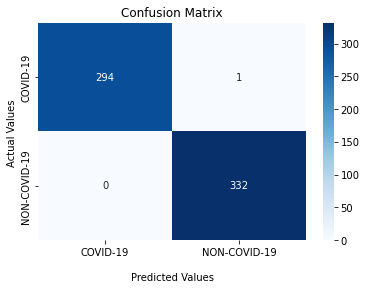

In [25]:


# cf_matrix=[[254,3],[2,238]]

import seaborn as sns
ax = sns.heatmap(cf_matrix, fmt='d',annot=True, cmap='Blues')
ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['COVID-19','NON-COVID-19'])
ax.yaxis.set_ticklabels(['COVID-19','NON-COVID-19'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [26]:
# print(y_test[1])

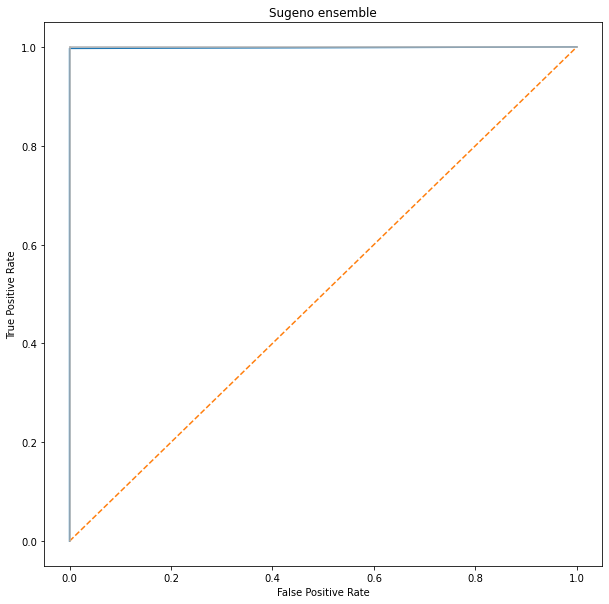

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def plot_roc(y_test,y_pred):
    false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred)
    plt.subplots(1, figsize=(10,10))
    plt.title('Sugeno ensemble')
    plt.plot(false_positive_rate1, true_positive_rate1)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

plot_roc(y_test=labels1,y_pred=y_score);

In [29]:
import numpy as np
axis =0
x=np.array([0.12, .845, .8])
X_sorted = np.sort(x, axis = axis)
print("sort",X_sorted)
print("index",np.arange(0, X_sorted.shape[axis]))
np.take(X_sorted, np.arange(0, X_sorted.shape[axis]), axis)

sort [0.12  0.8   0.845]
index [0 1 2]


array([0.12 , 0.8  , 0.845])

In [30]:
f1=np.minimum
np.minimum(np.take(X_sorted, np.arange(0, X_sorted.shape[axis]), axis), measure)
np.where([1,5,3] == np.max([1,5,3]))[0].tolist()

[1]